 # CESG 507 Final - Problem 1.        
 
Mohammad Asakreh

All three system options and one set of boundary conditions at nodes A and B.

Boundary conditions: pinned-free.

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join("..")))

In [2]:
from femedu.domain import *
from femedu.solver.NewtonRaphsonSolver import *
from femedu.elements.Frame2D import *
from femedu.materials.ElasticSection import ElasticSection

norm of the out-of-balance force:   0.0000e+00
+

 ** Stability check: (smallest eigenvalue of Kt) = 135.65064121073806

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   1.1141e-02
norm of the out-of-balance force:   1.8709e-11
+

 ** Stability check: (smallest eigenvalue of Kt) = 38.00931281894822

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   8.3060e-02
norm of the out-of-balance force:   5.3819e-14
+

 ** Stability check: (smallest eigenvalue of Kt) = -61.43824731683466

norm of the out-of-balance force:   0.0000e+00
+

 ** Stability check: (smallest eigenvalue of Kt) = 127.90534196458688

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   1.0703e-02
norm of the out-of-balance force:   2.3459e-13
+

 ** Stability check: (smallest eigenvalue of Kt) = 35.75166637297099

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   7.9777e-02
norm of the out-of-ba

norm of the out-of-balance force:   2.2798e-12
+

 ** Stability check: (smallest eigenvalue of Kt) = -52.63741523241249

norm of the out-of-balance force:   0.0000e+00
+

 ** Stability check: (smallest eigenvalue of Kt) = 127.90534196432138

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   1.0703e-02
norm of the out-of-balance force:   8.5538e-12
+

 ** Stability check: (smallest eigenvalue of Kt) = 35.75166637284257

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   7.9777e-02
norm of the out-of-balance force:   1.7458e-11
+

 ** Stability check: (smallest eigenvalue of Kt) = -57.60911864348536

norm of the out-of-balance force:   0.0000e+00
+

 ** Stability check: (smallest eigenvalue of Kt) = 135.65064120976987

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   1.1141e-02
norm of the out-of-balance force:   1.8325e-11
+

 ** Stability check: (smallest eigenvalue of Kt) = 38.0093128106

norm of the out-of-balance force:   0.0000e+00
+

 ** Stability check: (smallest eigenvalue of Kt) = 153.2129703694587

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   6.1283e-03
norm of the out-of-balance force:   1.8924e-12
+

 ** Stability check: (smallest eigenvalue of Kt) = 78.04018002779935

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   2.4824e-02
norm of the out-of-balance force:   3.7505e-12
+

 ** Stability check: (smallest eigenvalue of Kt) = 2.337156434307444

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   1.2863e+00
norm of the out-of-balance force:   5.1462e-12
+

 ** Stability check: (smallest eigenvalue of Kt) = -73.97696022181185

norm of the out-of-balance force:   0.0000e+00
+

 ** Stability check: (smallest eigenvalue of Kt) = 173.1776614020017

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   6.6621e-03
norm of the out-of-bala

norm of the out-of-balance force:   9.5603e-03
norm of the out-of-balance force:   4.6468e-12
+

 ** Stability check: (smallest eigenvalue of Kt) = -1.2437076520476593

norm of the out-of-balance force:   0.0000e+00
+

 ** Stability check: (smallest eigenvalue of Kt) = 112.95008947300053

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   2.4175e-03
norm of the out-of-balance force:   1.1139e-12
+

 ** Stability check: (smallest eigenvalue of Kt) = 59.53524271377517

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   9.1421e-03
norm of the out-of-balance force:   4.5498e-12
+

 ** Stability check: (smallest eigenvalue of Kt) = 6.075728936016609

norm of the out-of-balance force:   2.0671e+03
norm of the out-of-balance force:   1.3390e-01
norm of the out-of-balance force:   1.2863e-12
+

 ** Stability check: (smallest eigenvalue of Kt) = -47.433377867569455

norm of the out-of-balance force:   0.0000e+00
+

 ** Stability ch

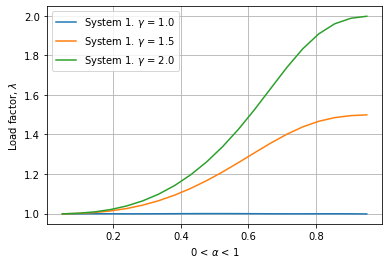

In [33]:

# Only for system option number one (one system at a time)

# loop over gamma values
L      = 100
Nelems = 2

alphas = np.linspace(0.05, 0.95, 20)

for gamma in [1.0, 1.5, 2.0]:
#for gamma in [2.0,]:
    
    lambdas = []
    
    for alpha in alphas:
        
        # Calculate span lengths for each option

        SpanLengths_I   = [(1-alpha)*L/2, alpha*L, (1-alpha)*L/2]   # span length - option 1.
        SpanLengths_II  = [(alpha)*L/2, (1.-alpha)*L, (alpha)*L/2]   # span length - option 1.
        SpanLengths_III = [(alpha)*L, (1.-alpha)*L]   # span length - option 1.

        params_II = [{'E': 29000., 'A': 5, 'I': gamma*100.},
                  {'E': 29000., 'A': 5, 'I': 100.},
                  {'E': 29000., 'A': 5, 'I': gamma*100.}]
        
        params_I = [{'E': 29000., 'A': 5, 'I': 100.},
                  {'E': 29000., 'A': 5, 'I': gamma*100.},
                  {'E': 29000., 'A': 5, 'I': 100.}]
        
        params_III = [ {'E': 29000., 'A': 5, 'I': gamma*100.},
                  {'E': 29000., 'A': 5, 'I': 100.}]
        
        SpanLengths = SpanLengths_III
        params      = params_III

        # ========== setting load parameters ==============

        w = -0.01                               # uniform lateral load on the column        
        Pcr = np.pi**2 * 29000. * 100. / L**2   # Euler buckling load

        # ========== setting analysis parameters ==============

        target_load_level = 6.5      # 195% of Euler load
        max_steps = 10            

        w   *= 0.01

        load_levels = np.linspace(0, target_load_level, max_steps)

        # meshing parameters

        Xnode  = 0.0
        Ynode  = 0.0

        model = System()
        model.setSolver(NewtonRaphsonSolver())

        # create left node

        nd0 = Node(Xnode, Ynode)
        nd0.fixDOF('ux', 'uy')    
        model += nd0

        ndi = nd0

        for SpanLength, param in zip(SpanLengths, params):

            Le = SpanLength / Nelems

            # skip this span if it has zero length
            if Le < 1.0e-5:
                continue

            for e in range(Nelems):

                # create next node

                Xnode += Le
                ndj = Node(Xnode, Ynode)
                model += ndj  

                # create elements

                elem = Frame2D(ndi, ndj, ElasticSection(param))
                model += elem   

                # shift one node to the right

                ndi = ndj

                elem.setDistLoad(w)  

        # support

        ndi.fixDOF('uy')

        ndi.setLoad((-Pcr,), ('ux',))

        # initialize the analysis:

        model.resetDisplacements()   # U all zeros
        #model.setLoadFactor(0.0)     # known equilibrium solution

        model.startRecorder()        

        detKt = []
        lams  = []

        for loadfactor in load_levels:

            model.setLoadFactor(loadfactor)
            model.solve(verbose=False)

            # stability check

            dKt = model.solver.checkStability()
            detKt.append(dKt)
            lams.append(loadfactor)

            if dKt < 0.0:
                #plt.plot(lams,detKt,'--*r')
                #plt.plot(lams,np.zeros_like(lams),'-k')
                #plt.grid(True)
                #plt.show()
                
                f0   = detKt[-2] # second to last stability index
                f1   = detKt[-1] # last stability index
                lam0 = lams[-2]  # second to last load level
                lam1 = lams[-1]  # last load level
                
                # find lam_cr for which detKt goes through zero
                lam_cr = (f1 * lam0 - f0 * lam1) / (f1 - f0)
                
                lambdas.append(lam_cr)
                break

    
    # plot lambda versus alpha for the current gamma value
    
    plt.plot(alphas, lambdas, label=f'System 1. $\\gamma$ = {gamma}')

plt.grid(True)
plt.xlabel('0 < $\\alpha$ < 1')
plt.ylabel('Load factor, $\\lambda$')
plt.legend()
plt.savefig("summary.png")
plt.show()
#print(model)

In [ ]:
print(lambdas)